In [1]:
# Enable autoloading for utils.py and convert.py
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import convert

In [3]:
# Change plot font size
import matplotlib
matplotlib.rc('font', size=12)
matplotlib.rcParams['figure.dpi']= 600

# Plot filter throughputs

In [4]:
def plot_bandpass(fig, ax, bandpass_name, spectrum=None):
    bandpass = utils.get_bandpass(bandpass_name)
    bandpass_label = utils.LABELMAP[bandpass_name]
    bandpass_color = utils.COLORMAP[bandpass_name]
    
    if spectrum is None:
        ax.plot(bandpass.wave, bandpass.throughput, c=bandpass_color, label=bandpass_label)
    else:
        observation = utils.S.Observation(spectrum, bandpass, force='extrap')
        ax.plot(observation.binwave, observation.binflux, c=bandpass_color, label=bandpass_label)

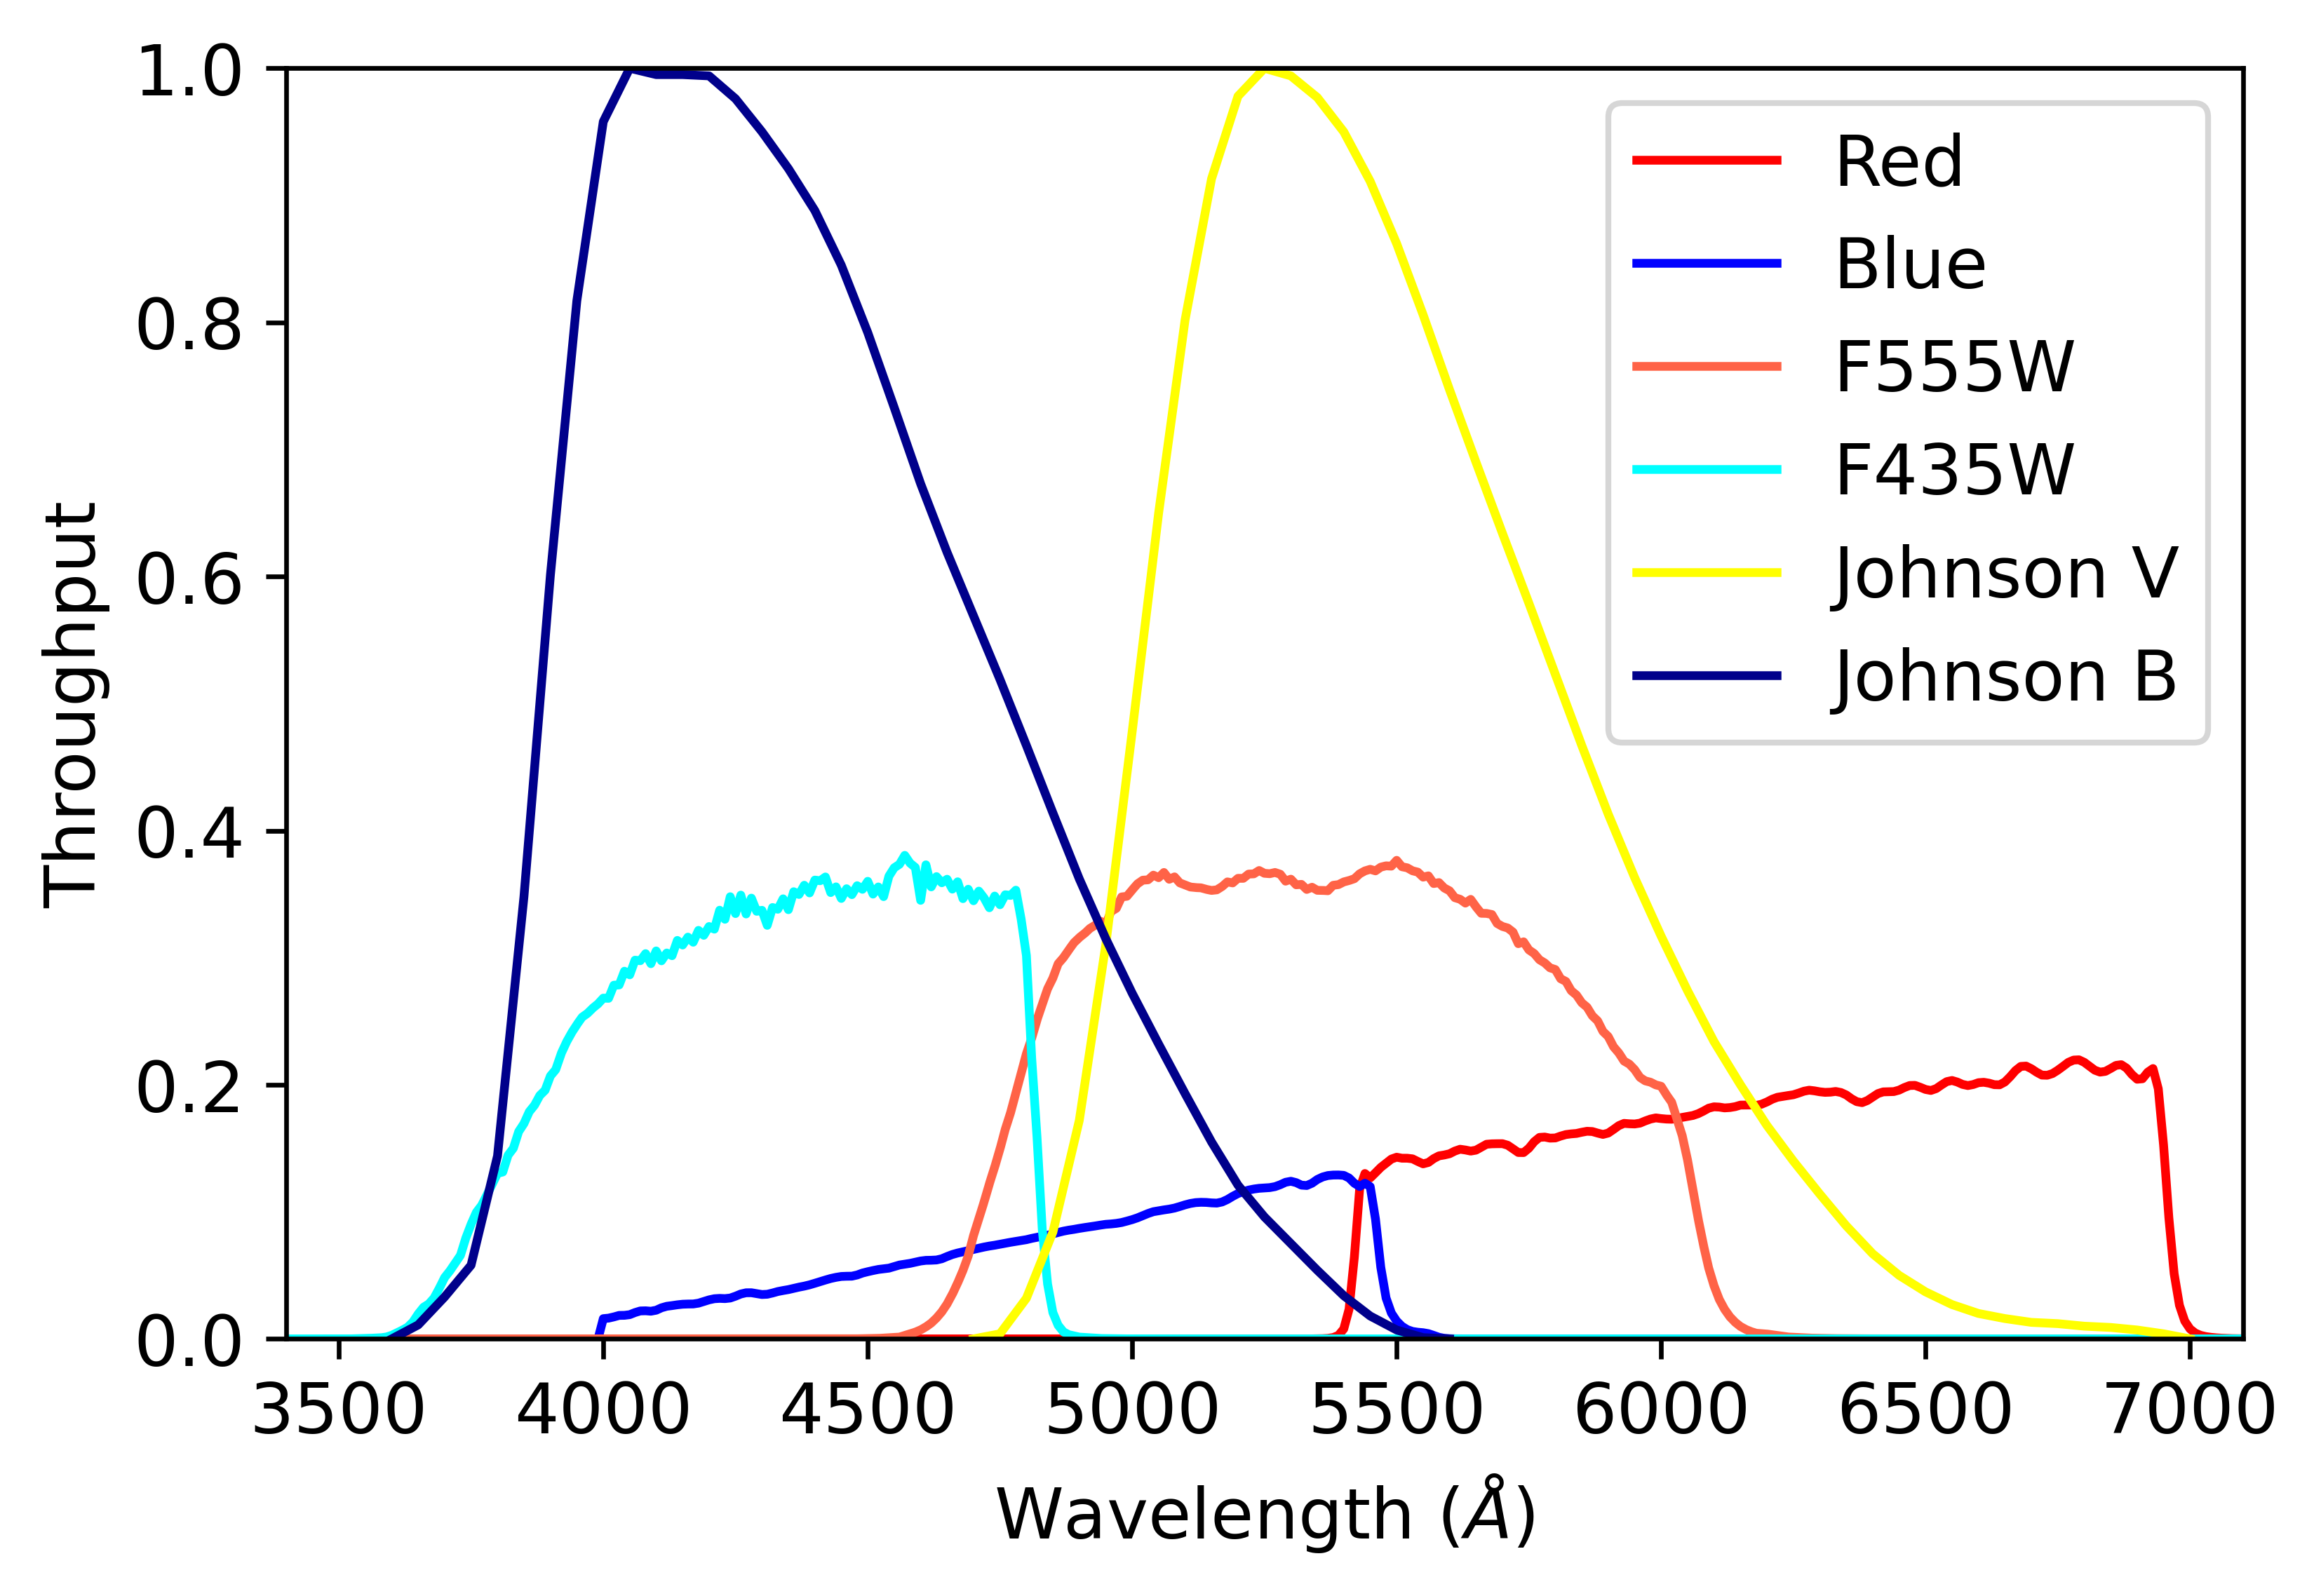

In [5]:
# Plot without spectrum

# Matplotlib setup
fig, ax = plt.subplots()

# Plot throughputs
bandpasses = ['NH_RED', 'NH_BLUE', 
              'HST_F555W', 'HST_F435W',
              'JOHNSON_V', 'JOHNSON_B']
for bp in bandpasses:
    plot_bandpass(fig, ax, bp)
    

# Show plot
ax.set_xlabel(r"Wavelength ($\AA$)")
ax.set_ylabel(r"Throughput")

ax.set_xlim(3400, 7100)
ax.set_ylim(0, 1)

ax.legend()

plt.show()

(NH_RED) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_BLUE) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(NH_NIR) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F555W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(HST_F435W) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(JOHNSON_V) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(JOHNSON_B) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(JOHNSON_R) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


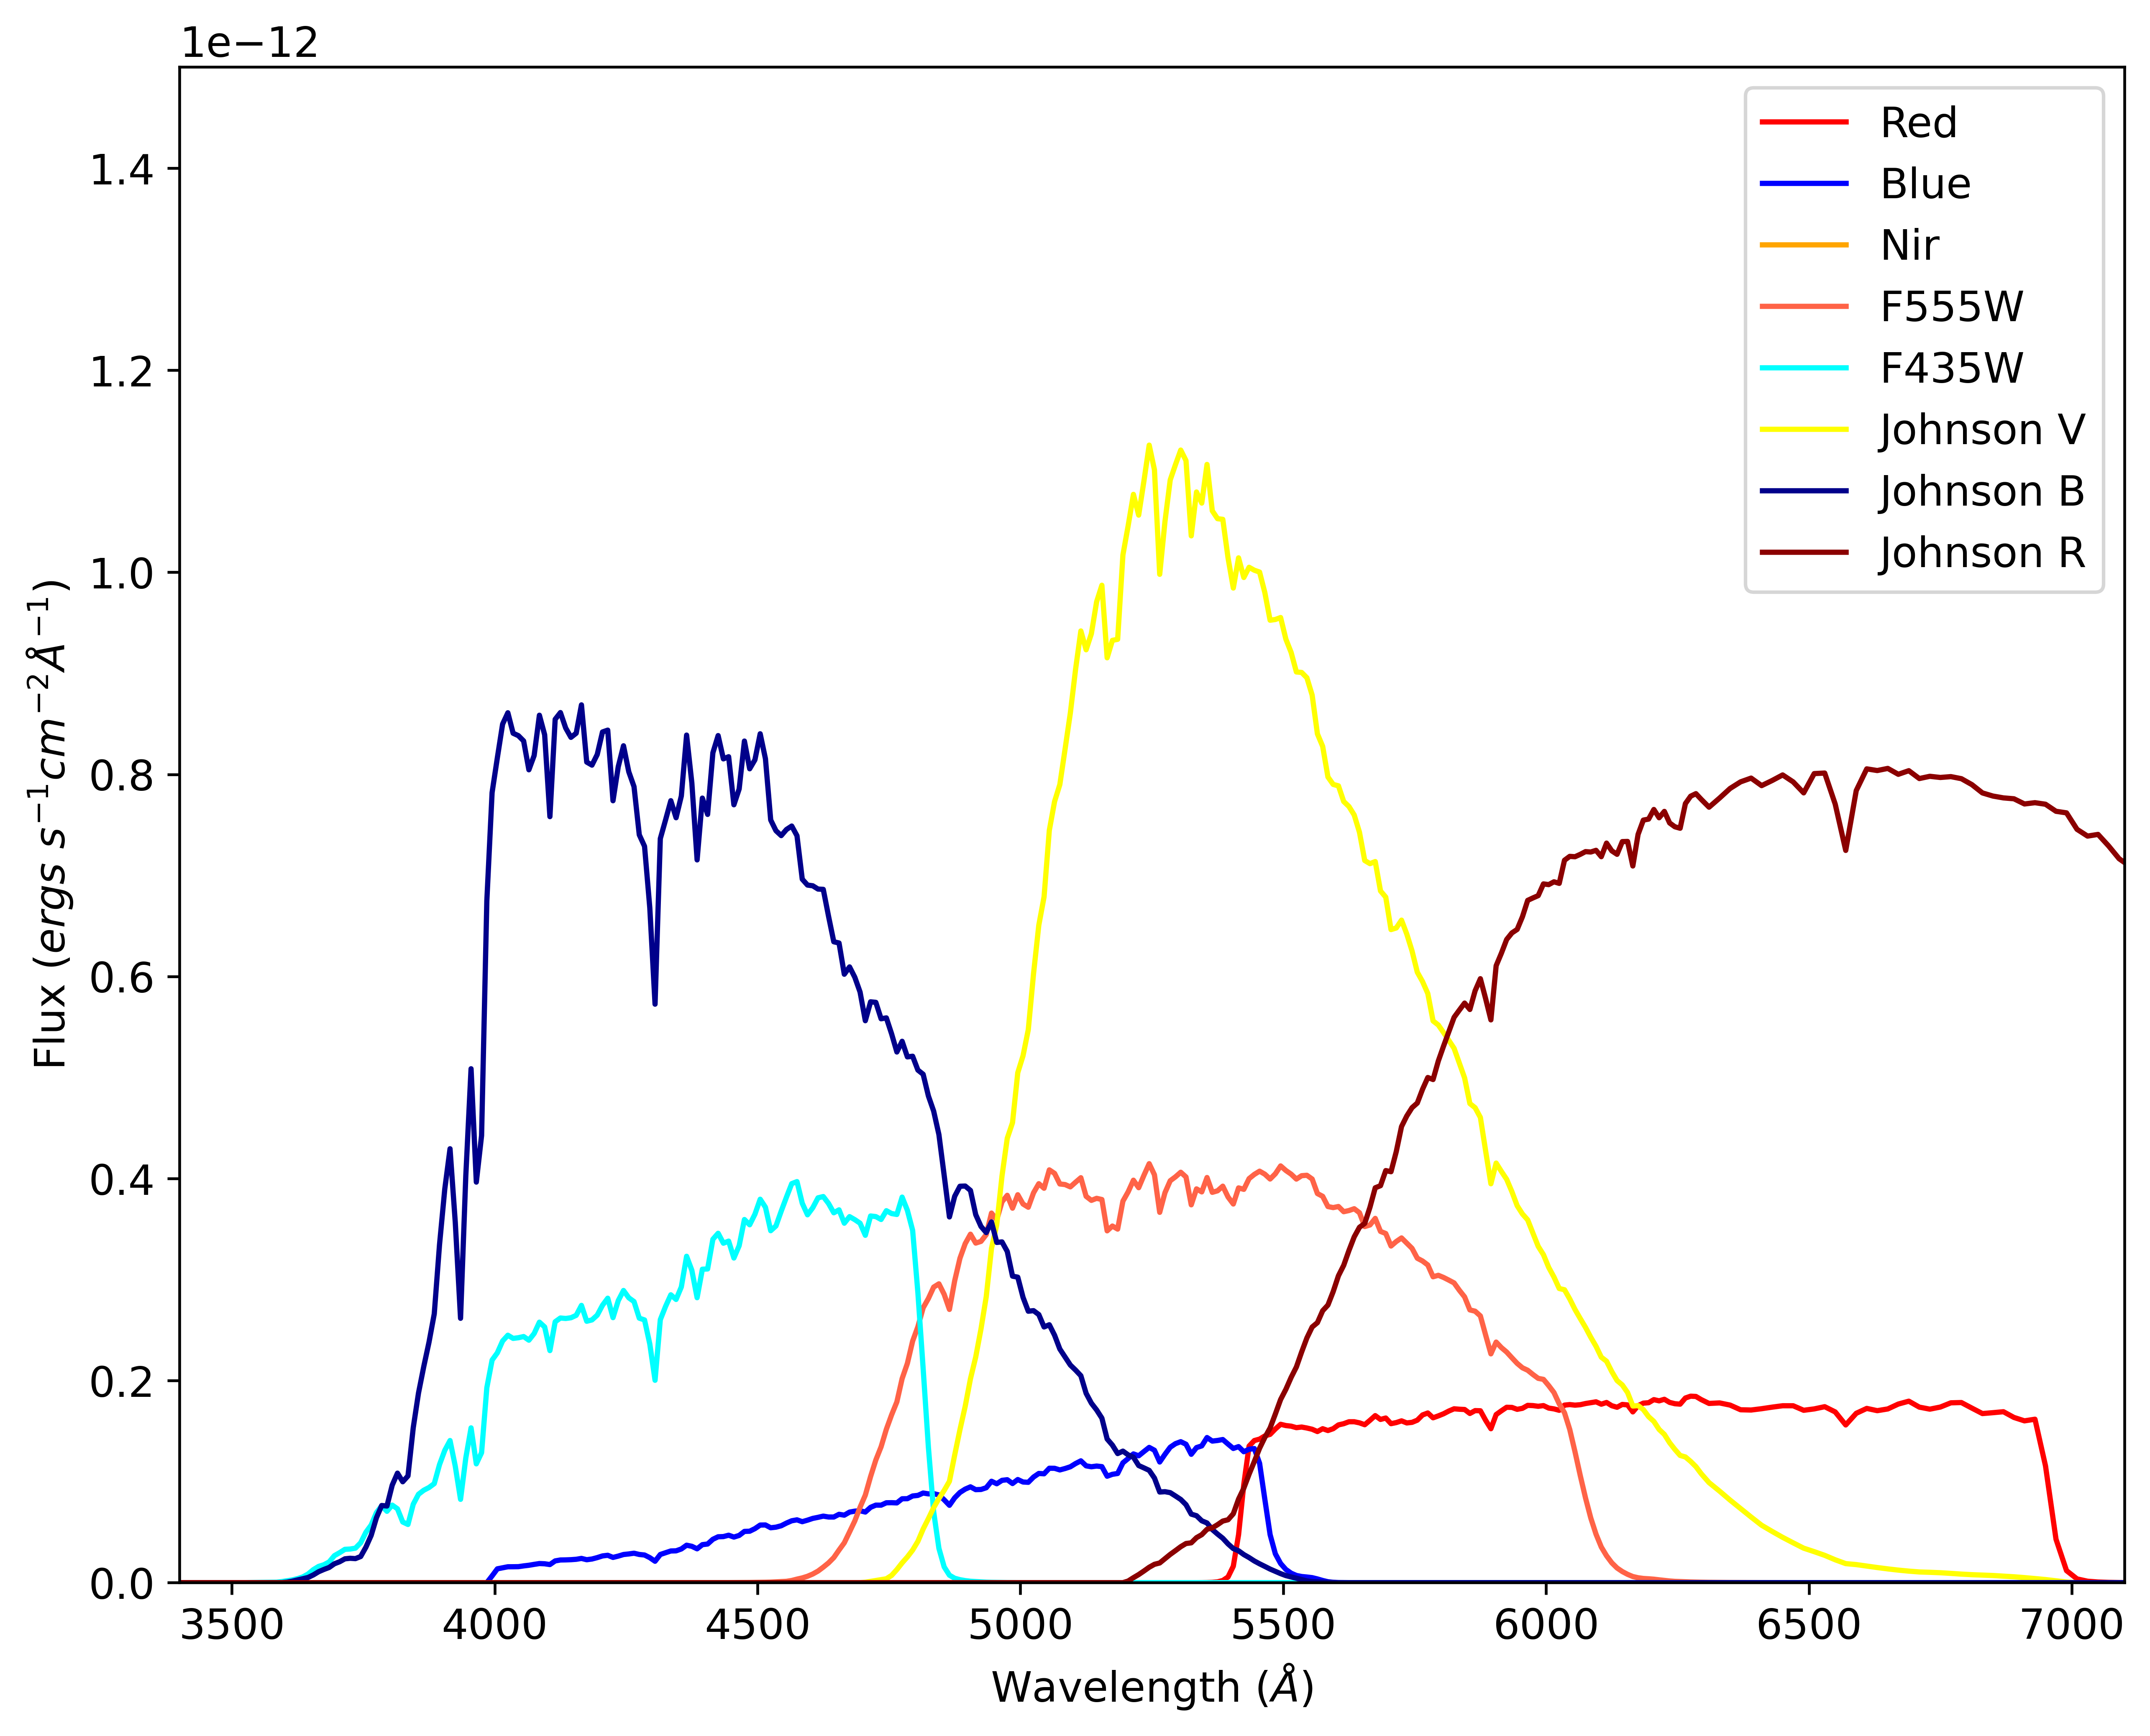

In [6]:
# Maybe split this into two plots?
# Plot with spectrum

# Matplotlib setup
fig, ax = plt.subplots(figsize=(10, 8))

# Plot throughputs
bandpasses = ['NH_RED', 'NH_BLUE', 'NH_NIR', 
              'HST_F555W', 'HST_F435W',
              'JOHNSON_V', 'JOHNSON_B',
              'JOHNSON_R']
spectrum = utils.get_spectrum('pluto')
spectrum.convert('Angstrom')
spectrum.convert('flam')
for bp in bandpasses:
    plot_bandpass(fig, ax, bp, spectrum=spectrum)
    

# Show plot
# ax.set_ylim(0, 0.4)
ax.set_xlabel(r"Wavelength ($\AA$)")
ax.set_ylabel(
    r"Flux ($ergs\ s^{−1} cm^{−2} \AA^{−1}$)"
)

ax.set_xlim(3400, 7100)
ax.set_ylim(0, 15e-13)

ax.legend()
plt.show()

# Relative Contributions
In order to use the measurements from both the New Horizons Red and Blue filters, a method for combining and converting the measurements is required. For the F555W filter, the following process is used: (1) Each input filter (NH Red and NH Blue) is converted using the normal single-filter process; (2) correlation factors are computed between the input filters and the output filters; (3) the final result is computed as the average of the single-filter conversions weighted by the correlation factors. 

In [7]:
%%capture
table = convert.get_factor_table(
    ['pluto', 'charon', 'vega'],
    ['NH_RED', 'NH_BLUE', 'NH_NIR'],
    ['HST_F555W', 'HST_F435W','JOHNSON_V', 'JOHNSON_B','JOHNSON_R'],
    float_format='%.4f',
    bold_rows=True, 
    multicolumn_format='c', # Center Spectrum Labels
    na_rep='', # Missing data is just blank
)

In [8]:
print(table)

\begin{tabular}{lrrrrrrrrr}
\toprule
\textbf{Target} & \multicolumn{3}{c}{Pluto} & \multicolumn{3}{c}{Charon} & \multicolumn{3}{c}{Vega} \\
\textbf{Input Filter} &    Red &   Blue &    Nir &    Red &   Blue &    Nir &    Red &   Blue &    Nir \\
\midrule
\textbf{F555W    } & 0.5479 & 0.4521 &        & 0.5237 & 0.4763 &        & 0.4801 & 0.5199 &        \\
\textbf{F435W    } & 0.0000 & 1.0000 &        &        & 1.0000 &        &        & 1.0000 &        \\
\textbf{Johnson V} & 0.5830 & 0.4170 &        & 0.5638 & 0.4362 &        & 0.5216 & 0.4784 &        \\
\textbf{Johnson B} & 0.0069 & 0.9931 &        & 0.0055 & 0.9945 &        & 0.0040 & 0.9960 &        \\
\textbf{Johnson R} & 0.8476 & 0.0074 & 0.1450 & 0.8584 & 0.0083 & 0.1333 & 0.8705 & 0.0105 & 0.1191 \\
\bottomrule
\end{tabular}

